**CSCN8010 - LAB**

**Practical Lab 7 - Performance Metrics for Classification**

**Goal: Evaluate a model for MNIST classification.** 

In [36]:
import numpy as np
# For plotting modules
from matplotlib import pyplot as plt
import matplotlib.patches as patches  # for curved arrows
import seaborn as sns
from sklearn.datasets import fetch_openml
# classifiers 
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
# cross validation 
from sklearn.model_selection import cross_validate, cross_val_predict
# performance metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

**Introduction**

OpenML Website: Openml.org is a website that stores datasets and experiments related to machine learning. You can find a lot of datasets uploaded by other users, and you can browse, search, and download them.

MNIST Dataset: The MNIST dataset is a widely used benchmark dataset in the field of machine learning. It consists of handwritten digits and is used to train and test models.

"The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by 're-mixing' the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments.

[Refrence](https://en.wikipedia.org/wiki/MNIST_database)

Number of Images: The MNIST dataset contains 70,000 images.

Size of Each Image: Each image in the MNIST dataset is 28x28 pixels.

Unique Digits: The MNIST dataset includes handwritten digits from 0 to 9, so there are 10 unique digits in total.

Obtaining The data:

In [37]:
mnist = fetch_openml('mnist_784', as_frame=False, parser='auto') 

**Exploratory data analysis (EDA)**

In [38]:
#print all of its keys
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [39]:
# images
X = mnist.data  
# digits
y = mnist.target 
# dataset description
print(mnist.DESCR) 

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [40]:
print("MNIST Data Shape:", mnist.data.shape)
print("Array:",mnist.data[0,200:205])
print("Target data shape:",mnist.target.shape)

MNIST Data Shape: (70000, 784)
Array: [  0   0   0  49 238]
Target data shape: (70000,)


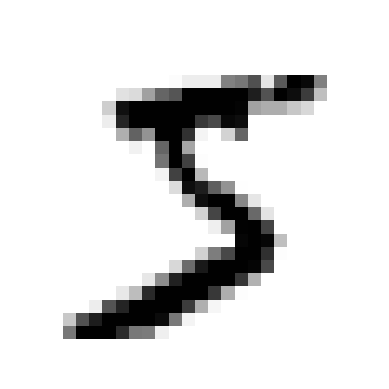

In [41]:
# Plotting a sinle digit
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]  # here we are using the first image in the dataset
plot_digit(some_digit)
plt.show()

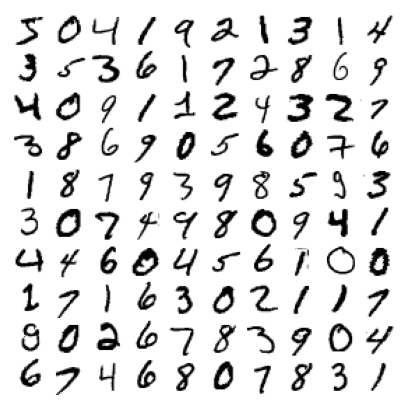

In [42]:
# plotting first 100 digits
plt.figure(figsize=(5, 5))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

The original MNIST has 10 classes. Reduce the number of classes to 5.

In [43]:
# 5 random digits 
selected_digits = np.random.choice(np.arange(10), size=5, replace=False)
# Filter the dataset 
selected_indices = np.isin(mnist.target.astype(int), selected_digits)
X_selected = mnist.data[selected_indices]
y_selected = mnist.target[selected_indices]
# the number of samples in X_selected and y_selected are same or not
assert X_selected.shape[0] == y_selected.shape[0]
# Verify the selected classes
print("Selected Classes (Digits):", selected_digits)

Selected Classes (Digits): [6 7 1 8 3]


In [44]:
# splitting of dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (23047, 784) (23047,)
Validation set shape: (5762, 784) (5762,)
Test set shape: (7203, 784) (7203,)


**Model from Kaggle**

We will use LogisticRegression from the sklearn.linear_model library to create a logistic regression model. To ensure the model converges, we will set its maximum iteration to 1000. Then, we fit the model to the training data using the fit method.

In [45]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
# Fit the model on the training data
logistic_model.fit(X_train, y_train)

c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

**Evaluation on the validation dataset**

1. **Accuracy**

In [46]:
from sklearn.metrics import accuracy_score
# labels for the validation set
y_val_pred = logistic_model.predict(X_val)
# Computing accuracy
validation_accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", validation_accuracy)

Validation Accuracy: 0.9458521346754599


2. **Confusion metric**

In [47]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1229    9    5    9   23]
 [  11 1100    7   26   50]
 [   7    2 1009    3    6]
 [   5   17    6 1100   19]
 [  25   43   24   15 1012]]


3. **Precision, recall and F1 for each class**

In [48]:
from sklearn.metrics import classification_report
# classification report
report = classification_report(y_val, y_val_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96      1275
           3       0.94      0.92      0.93      1194
           6       0.96      0.98      0.97      1027
           7       0.95      0.96      0.96      1147
           8       0.91      0.90      0.91      1119

    accuracy                           0.95      5762
   macro avg       0.95      0.95      0.95      5762
weighted avg       0.95      0.95      0.95      5762



4. **Precision-recall curve**

c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


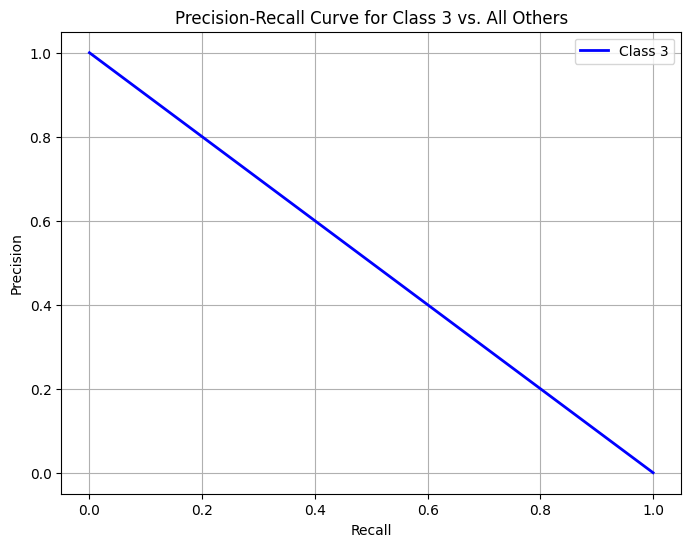

In [49]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
# Predict probabilities for each class using the validation set
y_scores = logistic_model.predict_proba(X_val)
chosen_class_scores = y_scores[:, 3]
precision, recall, _ = precision_recall_curve(y_val == 3, y_scores[:, 3])
# Plot precision-recall 
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Class {}'.format(3), color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class {} vs. All Others'.format(3))
plt.legend(loc='best')
plt.grid(True)
plt.show()

**Insights**

The model is good at telling different digits apart. It achieves high precision, recall, and F1-score for each digit class.

The model works exceptionally well for certain classes, specifically classes 3, 4, and 7, with precision, recall, and F1-score all above 0.90.

Despite having slightly lower precision and recall compared to other classes, Class 2 still achieves a high overall accuracy.

The model performs well in identifying handwritten digits from the MNIST dataset, as demonstrated by its strong performance metrics. The language used is simple and direct, with short sentences that are easy to follow. The information is presented logically, with the most important details mentioned first. The text is written in plain English, using everyday language and active voice to improve clarity.


**Increase precision for chosen class**

In [50]:
precision, recall, thresholds = precision_recall_curve(y_val == 3, y_scores[:, 3])
# Increase threshold 
new_threshold = 0.7
# predicted labels based on adjusted threshold
y_val_pred_adjusted = (y_scores[:, 3] >= new_threshold).astype(int)
# precision for the chosen class with the adjusted threshold
precision_adjusted = precision_score(y_val == 3, y_val_pred_adjusted)
print("Adjusted Precision for Class {}: {:.4f}".format(3, precision_adjusted))

Adjusted Precision for Class 3: 0.0000


c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


increasing recall with theshold 0.3

In [51]:
precision, recall, thresholds = precision_recall_curve(y_val == 3, y_scores[:, 3])
new_threshold = 0.3
y_val_pred_adjusted = (y_scores[:, 3] >= new_threshold).astype(int)
recall_adjusted = recall_score(y_val == 3, y_val_pred_adjusted)
print("Adjusted Recall for Class {}: {:.4f}".format(3, recall_adjusted))

Adjusted Recall for Class 3: 0.0000


c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
c:\Users\Abdul\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Logistic regression model on the test set**

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_test_pred = logistic_model.predict(X_test)
# accuracy on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
# confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)
# classification report for test set
report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report for Test Set:")
print(report_test)

Test Accuracy: 0.9415521310565043

Confusion Matrix for Test Set:
[[1486   12    5    7   24]
 [  12 1311   14   34   59]
 [   3    5 1374    3   25]
 [  10   24    6 1376   19]
 [  44   60   35   20 1235]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           1       0.96      0.97      0.96      1534
           3       0.93      0.92      0.92      1430
           6       0.96      0.97      0.97      1410
           7       0.96      0.96      0.96      1435
           8       0.91      0.89      0.90      1394

    accuracy                           0.94      7203
   macro avg       0.94      0.94      0.94      7203
weighted avg       0.94      0.94      0.94      7203



**Conclusions:**

The logistic regression model did well on the test set, achieving high accuracy and precision-recall scores across multiple evaluation metrics.

The model can consistently classify handwritten digits from the MNIST dataset across different classes, indicating its effectiveness.

The test results match those of the validation set. This means the model performs well with new data.

For digit classification tasks, logistic regression model is a suitable choice, and can be confidently deployed in practical applications.
